In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./data/south-korean-pollution-data.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

########## Simple Data Exploration 1 ##########
# Set pandas options to display all rows and columns
print("=========Dtype of all columns=========")
print(df.dtypes)

print("=========Involving Nan=========")
print(df.isna().sum())

print("========= Statistical Description =========") 
print(df.describe())


=========Dtype of all columns=========
Unnamed: 0      int64
date           object
pm25            int64
pm10            int64
o3              int64
no2             int64
so2             int64
co              int64
Lat           float64
Long          float64
City           object
District       object
Country        object
dtype: object
=========Involving Nan=========
Unnamed: 0    0
date          0
pm25          0
pm10          0
o3            0
no2           0
so2           0
co            0
Lat           0
Long          0
City          0
District      0
Country       0
dtype: int64
========= Statistical Description =========
         Unnamed: 0          pm25          pm10            o3           no2   
count  34530.000000  34530.000000  34530.000000  34530.000000  34530.000000  \
mean   17264.500000     53.224616     34.757428     34.506371     14.802114   
std     9968.096734     39.952008     21.046112     17.393329     11.479781   
min        0.000000      0.000000      0.000000 

In [5]:
########## Simple Data Exploration 2: 각 도시별 오염지수 평균 출력 ##########
# Everything here is before scaling
print("\n========= Mean values of pollutants for each city =========")
# Set pandas options to display all rows and columns

pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

# Before Scaling, compute the mean of poollutants for each city
city_pollutants_mean = df.groupby('City')[pollutants].mean()
print(city_pollutants_mean)

# 각 오염 물질에 대해 도시를 내림차순으로 정렬
city_ranking = {}
for pollutant in pollutants:
    city_ranking[pollutant] = city_pollutants_mean[pollutant].sort_values(ascending=False).index

city_ranking_df = pd.DataFrame(city_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(city_ranking_df)


========= Mean values of pollutants for each city =========
                      pm25       pm10         o3        no2       so2   
City                                                                    
Bangsan-Myeon    20.508208  26.663989  35.886483   3.799162  1.328327  \
Cheongnim-Dong   65.902985  36.868159  30.501244  16.982587  8.810945   
Geumchon-Dong    53.533241  40.785665  34.775277  19.585873  4.576177   
Gwanak-Gu        67.736806  37.376389  30.276042  29.051736  5.899306   
Hwasun-Eup       50.592904  25.227824  30.393091   8.750700  2.706816   
Hyeoksin-Dong    66.608197  33.039344  33.344262  12.962295  2.237705   
Jeongnim-Dong    43.443056  31.795139  33.016319  16.240972  2.740625   
Jungang-Way      60.187500  35.308239  34.301847  13.881747  3.773082   
Juwol-Dong       60.256545  33.860384  31.405934  21.294590  3.621291   
Nowon-Gu         64.545486  34.427880  31.416119  24.130405  6.147008   
Onui-Dong        59.957377  32.880328  25.495082  16.531148  1.

In [9]:
########## Simple Data Exploration 2: 각 '도(행정구역)'별 오염지수 평균 출력 ##########
print("\n========= Mean values of pollutants for each district =========")

# Before Scaling, compute the mean of poollutants for each 행정구역
district_pollutants_mean = df.groupby('District')[pollutants].mean()
print(district_pollutants_mean)

# 각 오염 물질에 대해 행정구역 내림차순으로 정렬
district_ranking = {}
for pollutant in pollutants:
    district_ranking[pollutant] = district_pollutants_mean[pollutant].sort_values(ascending=False).index

district_ranking_df = pd.DataFrame(district_ranking)

print("\n========= Ranking of cities for each pollutant =========")
print(district_ranking_df)


========= Mean values of pollutants for each district =========
                  pm25      pm10        o3       no2       so2        co
District                                                                
Chuncheon-Si  0.273580  0.051545  0.225670  0.163315  0.034301  0.017527
Chungbuk      0.293554  0.043968  0.221915  0.105149  0.017109  0.014188
Chungnam      0.212872  0.053408  0.262435  0.104942  0.027409  0.012905
Gangwon       0.124714  0.040519  0.224088  0.071005  0.013057  0.013190
Gyeongbuk     0.300925  0.047862  0.246510  0.143814  0.049423  0.016384
Gyeonggi      0.230470  0.056753  0.242384  0.105150  0.018611  0.012531
Jeonbuk       0.304335  0.048236  0.219705  0.150607  0.020175  0.011952
Jeonnam       0.229968  0.036829  0.199955  0.102949  0.024607  0.017790
Nam-Gu        0.273893  0.049431  0.206618  0.250525  0.032921  0.018916
Paju-Si       0.243333  0.059541  0.228785  0.230422  0.041602  0.021525
Seo-Gu        0.197468  0.046416  0.217213  0.191070  0.024

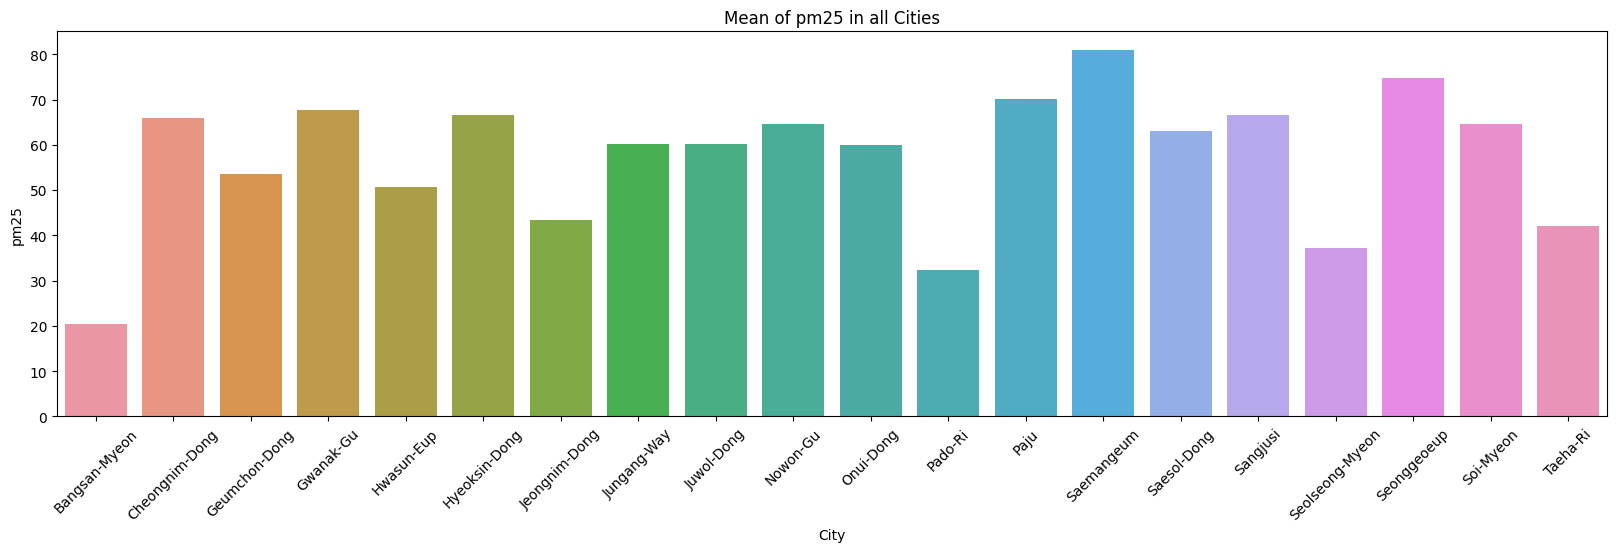

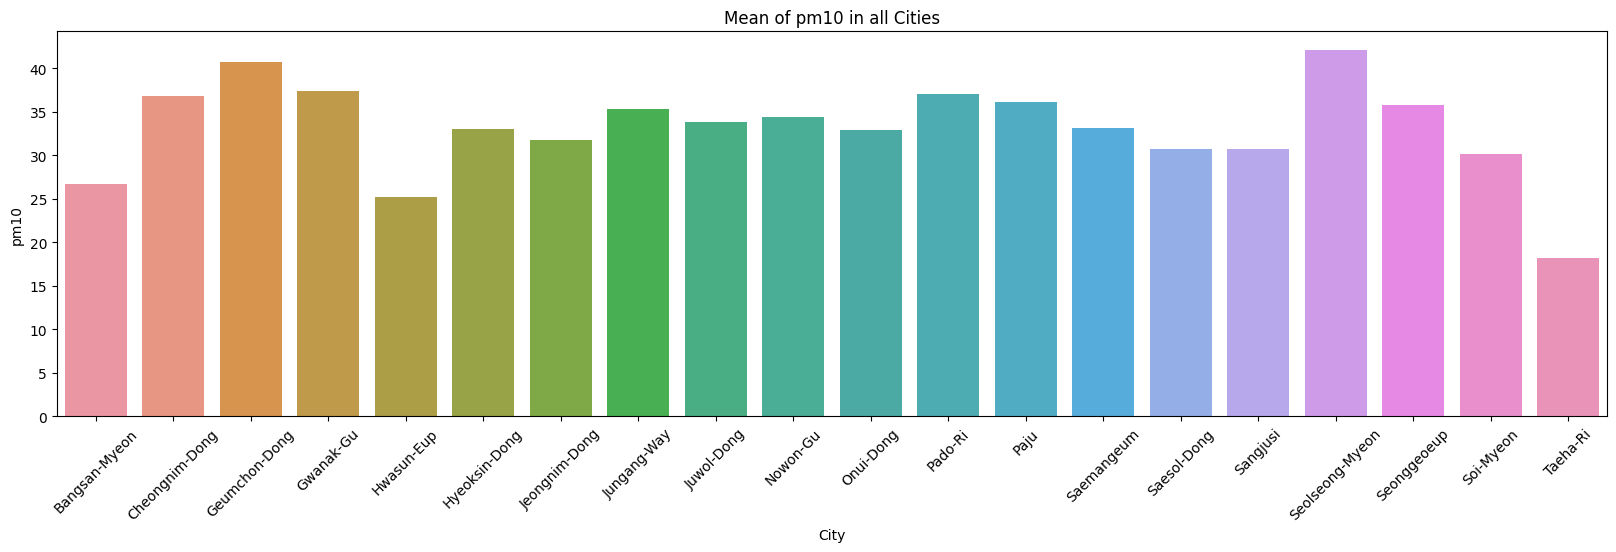

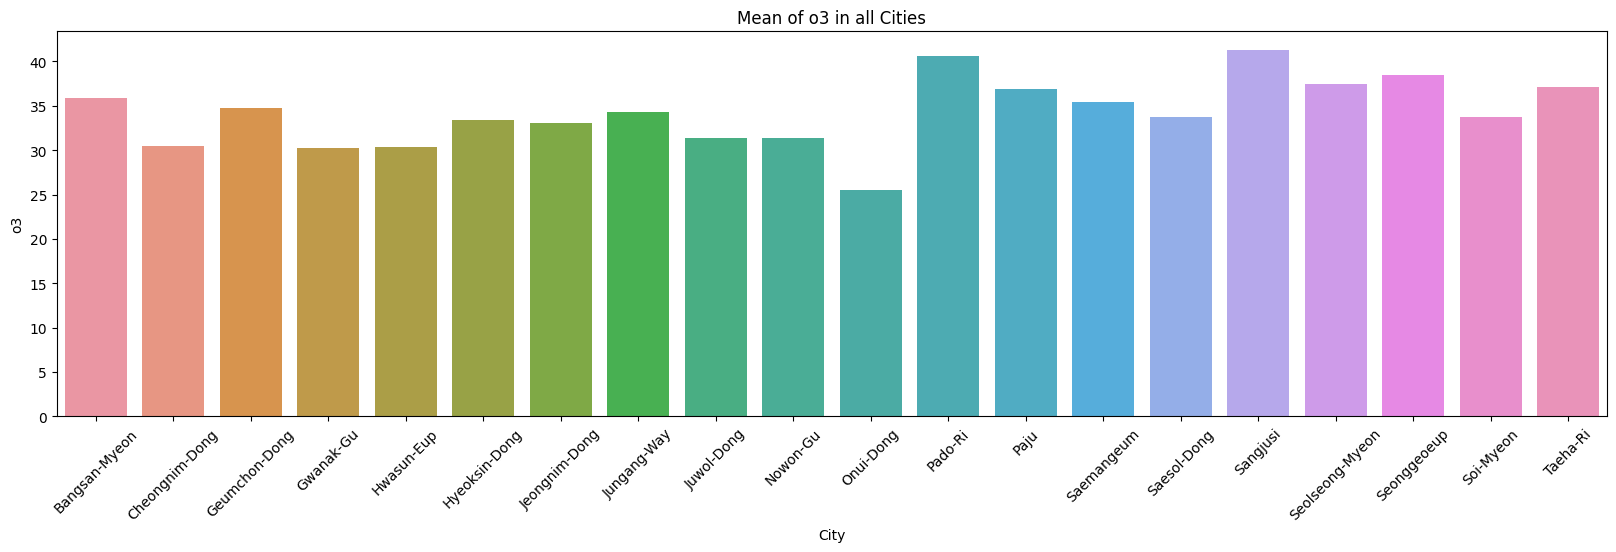

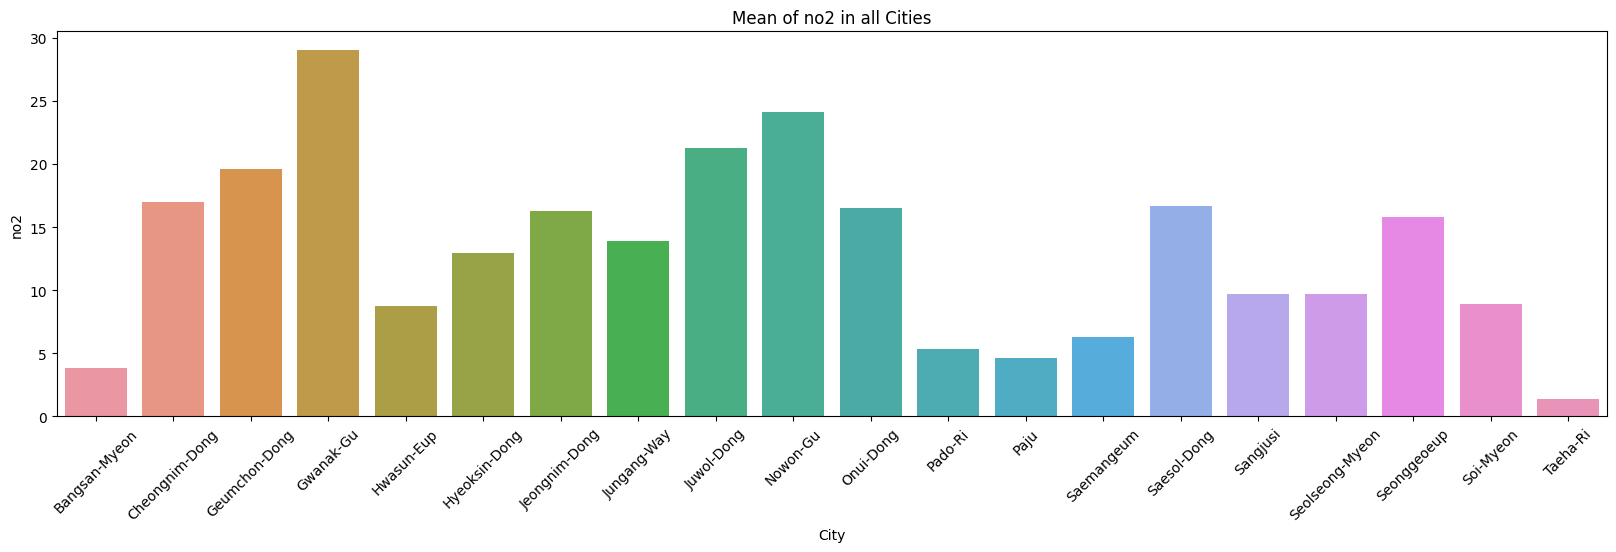

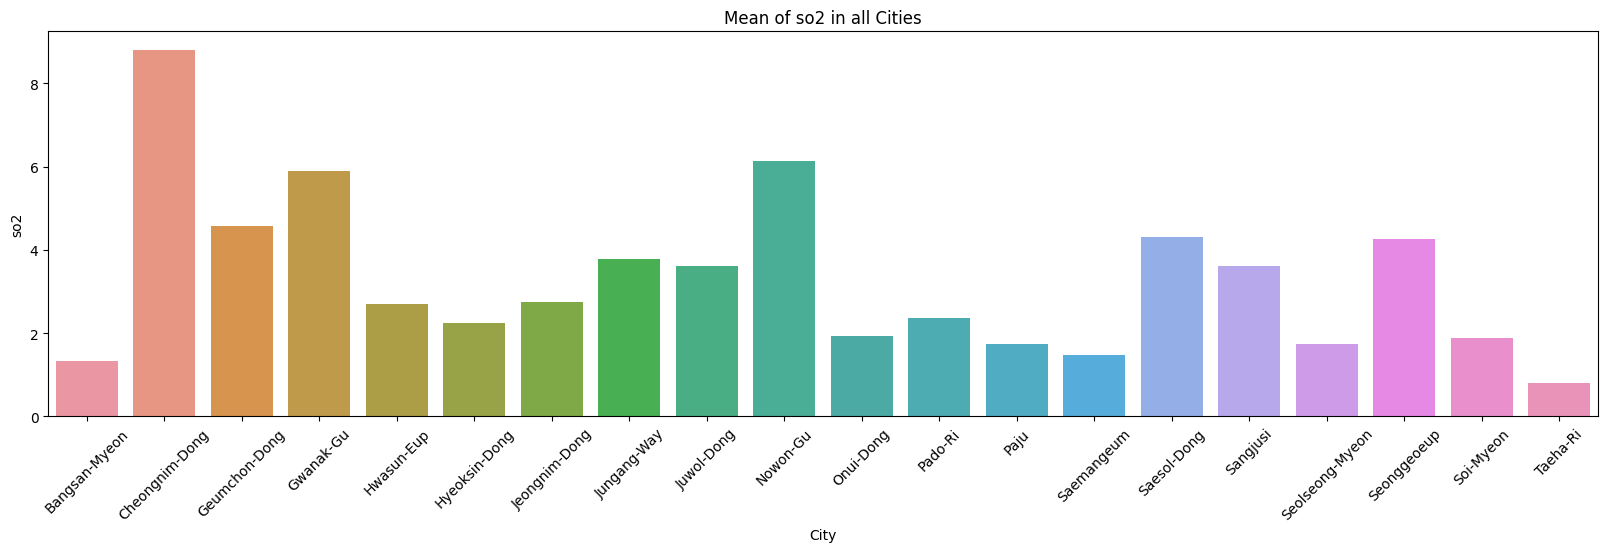

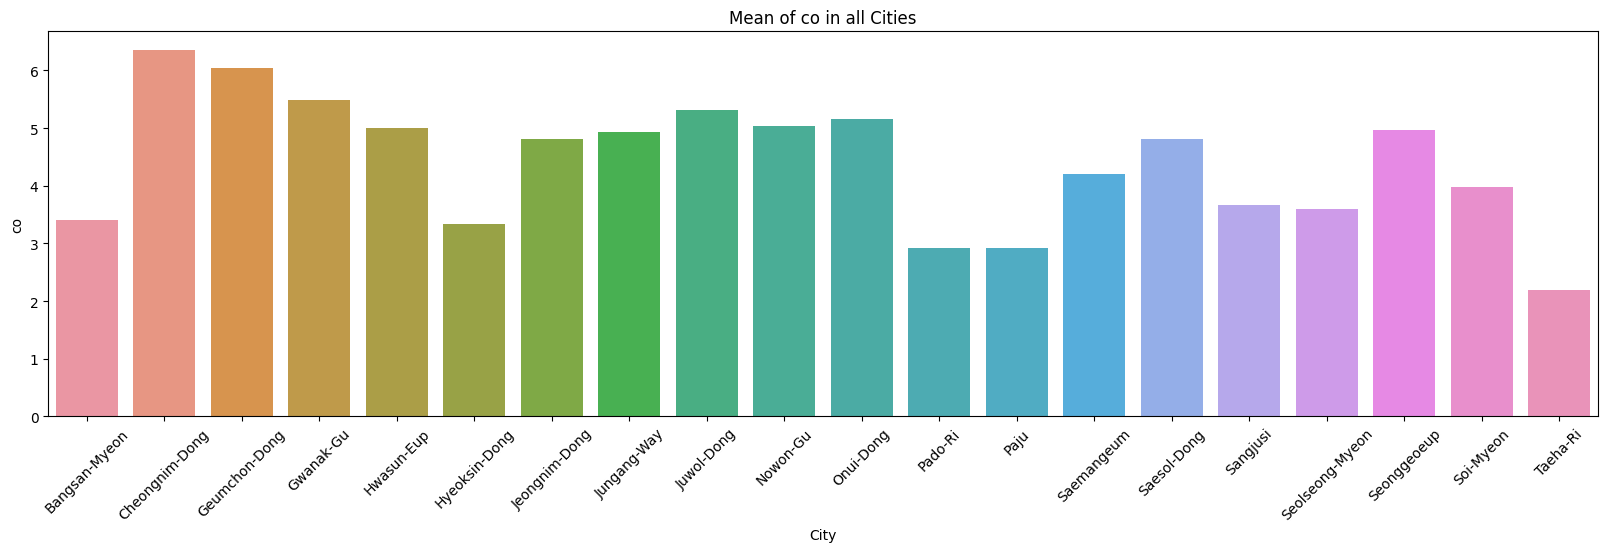

In [7]:
########## Simple Data Exploration 3: Plots-1 ##########
# 각 도시의 오염 물질별 평균 구하기
for pollutant in pollutants:
    plt.figure(figsize=(20, 5))
    sns.barplot(x=city_pollutants_mean.index, y=pollutant, data=city_pollutants_mean)
    plt.title(f'Mean of {pollutant} in all Cities')
    plt.xticks(rotation=45)
    plt.show()



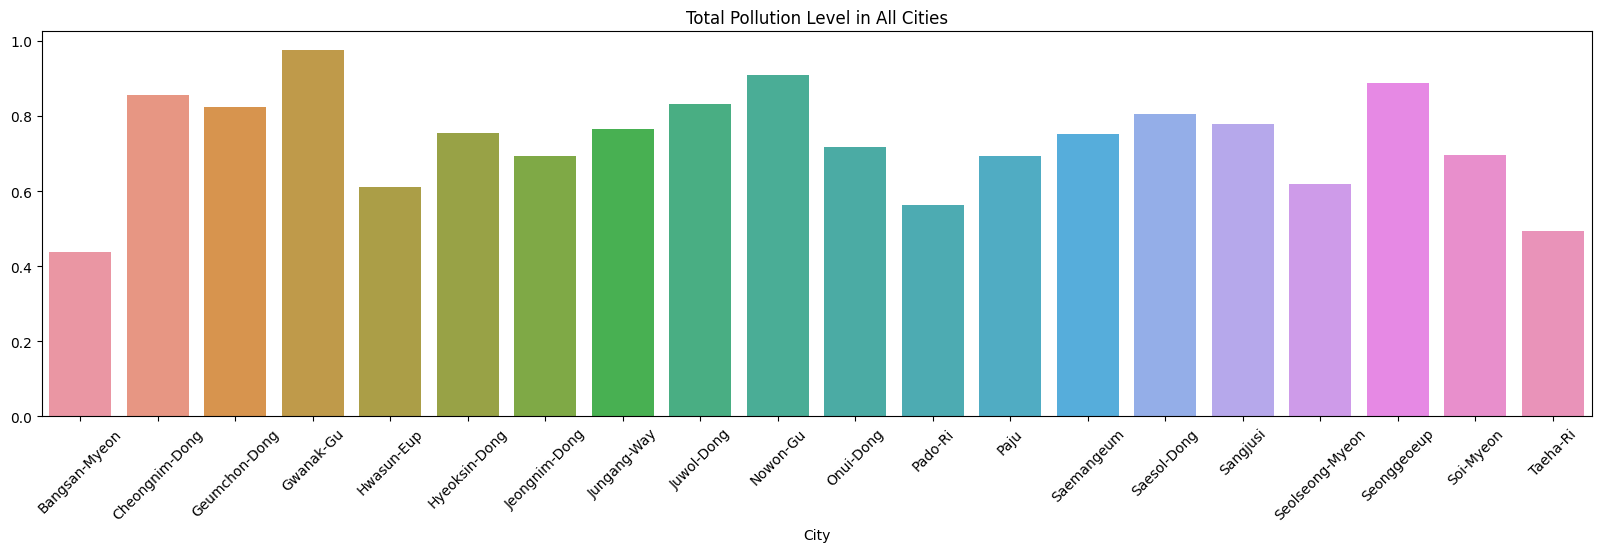

In [8]:
########## Simple Data Exploration 3: Plot-2 ##########
# Scaling with minmax
scaler = MinMaxScaler()
df[pollutants] = scaler.fit_transform(df[pollutants])

# 각 도시의 오염 물질의 스케일링된 값 합산 후 평균 구하기
city_total_means = df.groupby('City')[pollutants].mean().sum(axis=1)
# plot 2
plt.figure(figsize=(20, 5))
sns.barplot(x=city_total_means.index, y=city_total_means.values)
plt.title('Total Pollution Level in All Cities')
plt.xticks(rotation=45)
plt.show()